In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt

yeardata_csv = os.path.join('new_dataset_clipped.csv')
attributes_csv = os.path.join('FIFA_attributes.csv')
yeardata_df = pd.read_csv(yeardata_csv, encoding = "utf-8")
attributes_df = pd.read_csv(attributes_csv, encoding='ISO-8859-1')

#Ranking and Standing
rank_stand_csv = os.path.join('World_cup_ranking_standing.csv')
rank_stand_df = pd.read_csv(rank_stand_csv)

In [72]:
#Modify and Inspect yeardata_df
yeardata_df['Win_Percent'] = yeardata_df['Wins']/yeardata_df['Ttl_Games']
yeardata_df.head()

,Unnamed: 0,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent
0,133,Scotland,2005,2,3,4,11,8,9,0.222222
1,280,England,2005,7,3,1,19,11,11,0.636364
2,427,Wales,2005,5,3,1,7,8,9,0.555556
3,574,Northern Ireland,2005,5,3,2,8,17,10,0.500000
4,721,USA,2005,11,5,4,33,12,20,0.550000


In [73]:
#Inspect attributes_df
attributes_df.rename(columns={"Name":"Country"},inplace=True)
attributes_df.head()

,Year,Country,ATT,MID,DEF,OVR
0,2018,Spain,84,86,86,86
1,2018,Brazil,86,83,85,85
2,2018,Germany,81,85,84,85
3,2018,Belgium,86,84,85,84
4,2018,France,83,86,81,84


In [74]:
#Merge yeardata_df and attributes_df
total_info_df = pd.merge(yeardata_df, attributes_df, on=('Country', 'Year'))
total_info_df.head()

,Unnamed: 0,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR
0,133,Scotland,2005,2,3,4,11,8,9,0.222222,73,76,78,77
1,280,England,2005,7,3,1,19,11,11,0.636364,89,88,88,88
2,427,Wales,2005,5,3,1,7,8,9,0.555556,82,80,67,75
3,574,Northern Ireland,2005,5,3,2,8,17,10,0.500000,65,67,67,68
4,868,Uruguay,2005,6,0,5,9,11,11,0.545455,82,75,75,76


In [75]:
total_info_df_drop = total_info_df[["Country", "Year", "Wins", "Losses", "Draws", "Points_Scored",
                                  "Points_Against", "Ttl_Games", "Win_Percent","ATT", "MID", "DEF","OVR"]]
total_info_df_drop.head()

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR
0,Scotland,2005,2,3,4,11,8,9,0.222222,73,76,78,77
1,England,2005,7,3,1,19,11,11,0.636364,89,88,88,88
2,Wales,2005,5,3,1,7,8,9,0.555556,82,80,67,75
3,Northern Ireland,2005,5,3,2,8,17,10,0.500000,65,67,67,68
4,Uruguay,2005,6,0,5,9,11,11,0.545455,82,75,75,76


In [76]:
total_info_df_drop.reset_index().head()

,index,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR
0,0,Scotland,2005,2,3,4,11,8,9,0.222222,73,76,78,77
1,1,England,2005,7,3,1,19,11,11,0.636364,89,88,88,88
2,2,Wales,2005,5,3,1,7,8,9,0.555556,82,80,67,75
3,3,Northern Ireland,2005,5,3,2,8,17,10,0.500000,65,67,67,68
4,4,Uruguay,2005,6,0,5,9,11,11,0.545455,82,75,75,76


passing_math_df = pd.DataFrame(total_info_df['math_score']>70).rename(columns={'math_score':'passing_math'})
passing_math_df = passing_math_df.reset_index().rename(columns={'index':'Student ID'})

In [77]:
#Merge total_info_df with rank_stand_df
standing_merge = pd.merge(total_info_df_drop, rank_stand_df, on = ("Year", "Country"), how='outer')

In [78]:
standing_merge.head()

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR,Index,WC_Finals,WC_Qual,WC_Standing,FIFA_Ranking_PreWC
0,Scotland,2005,2.0,3.0,4.0,11.0,8.0,9.0,0.222222,73.0,76.0,78.0,77.0,0.0,0,0,NaN,NaN
1,England,2005,7.0,3.0,1.0,19.0,11.0,11.0,0.636364,89.0,88.0,88.0,88.0,1.0,0,0,NaN,NaN
2,Wales,2005,5.0,3.0,1.0,7.0,8.0,9.0,0.555556,82.0,80.0,67.0,75.0,2.0,0,0,NaN,NaN
3,Northern Ireland,2005,5.0,3.0,2.0,8.0,17.0,10.0,0.500000,65.0,67.0,67.0,68.0,3.0,0,0,NaN,NaN
4,Uruguay,2005,6.0,0.0,5.0,9.0,11.0,11.0,0.545455,82.0,75.0,75.0,76.0,4.0,0,0,NaN,NaN


In [79]:
standing_merge = standing_merge[['Country','Year','Wins','Losses','Draws','Points_Scored',
                                     'Points_Against','Ttl_Games','Win_Percent',
                                     'ATT','MID','DEF','OVR','WC_Standing',
                                     'FIFA_Ranking_PreWC',]]
standing_merge.head()

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR,WC_Standing,FIFA_Ranking_PreWC
0,Scotland,2005,2.0,3.0,4.0,11.0,8.0,9.0,0.222222,73.0,76.0,78.0,77.0,NaN,NaN
1,England,2005,7.0,3.0,1.0,19.0,11.0,11.0,0.636364,89.0,88.0,88.0,88.0,NaN,NaN
2,Wales,2005,5.0,3.0,1.0,7.0,8.0,9.0,0.555556,82.0,80.0,67.0,75.0,NaN,NaN
3,Northern Ireland,2005,5.0,3.0,2.0,8.0,17.0,10.0,0.500000,65.0,67.0,67.0,68.0,NaN,NaN
4,Uruguay,2005,6.0,0.0,5.0,9.0,11.0,11.0,0.545455,82.0,75.0,75.0,76.0,NaN,NaN


In [80]:
standing_merge = standing_merge.fillna(0)

In [81]:
standing_merge.to_csv("FIFA_standing_merge_dp.csv")

## Multiple Regression

In [90]:
#Filter the standing_merge dataframe to only the World Cup Years

standing_WCyears = standing_merge.loc[standing_merge['Year'].isin([2006,2010,2014])]
standing_WCyears.sample(8)

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR,WC_Standing,FIFA_Ranking_PreWC
44,Argentina,2006,5.0,2.0,2.0,16.0,11.0,9.0,0.555556,87.0,81.0,85.0,83.0,6.0,9.0
202,Norway,2010,4.0,5.0,0.0,13.0,8.0,9.0,0.444444,77.0,74.0,76.0,75.0,0.0,0.0
363,Chile,2014,4.0,3.0,2.0,12.0,7.0,9.0,0.444444,77.0,75.0,70.0,76.0,9.0,14.0
45,Belgium,2006,3.0,3.0,3.0,12.0,7.0,9.0,0.333333,76.0,75.0,71.0,73.0,0.0,0.0
215,Mexico,2010,11.0,4.0,5.0,30.0,18.0,20.0,0.550000,75.0,77.0,76.0,77.0,14.0,17.0
212,Portugal,2010,7.0,2.0,4.0,29.0,9.0,13.0,0.538462,79.0,84.0,82.0,82.0,11.0,3.0
384,Colombia,2014,5.0,3.0,2.0,21.0,8.0,10.0,0.500000,77.0,78.0,75.0,77.0,5.0,8.0
609,North Korea,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,105.0


In [91]:
# Use Pandas get_dummies to convert categorical data

standing_WCyears = pd.get_dummies(standing_WCyears)
standing_WCyears.head()

,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,...,Country_Switzerland,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Ukraine,Country_United States,Country_Uruguay,Country_Venezuela,Country_Wales
37,2006,3.0,3.0,1.0,15.0,7.0,7.0,0.428571,72.0,73.0,...,0,0,0,0,0,0,0,0,0,0
38,2006,9.0,1.0,4.0,28.0,7.0,14.0,0.642857,91.0,85.0,...,0,0,0,0,0,0,0,0,0,0
39,2006,4.0,2.0,2.0,11.0,11.0,8.0,0.500000,78.0,77.0,...,0,0,0,0,0,0,0,0,0,1
40,2006,4.0,3.0,1.0,7.0,9.0,8.0,0.500000,65.0,67.0,...,0,0,0,0,0,0,0,0,0,0
41,2006,4.0,4.0,2.0,13.0,7.0,10.0,0.400000,84.0,77.0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
# Assign X (data) and y (target)

X = standing_WCyears[["Win_Percent","ATT","MID","DEF","OVR","FIFA_Ranking_PreWC"]]
y = standing_WCyears["WC_Standing"].values.reshape(-1, 1)
print(X.shape, y.shape)

(157, 6) (157, 1)


In [93]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [95]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [96]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

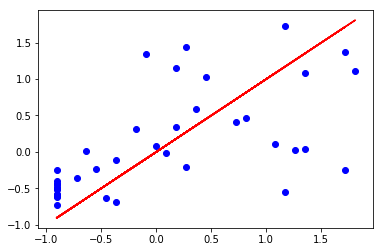

In [97]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions, c='blue')
plt.show()

In [98]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5116805354892993, R2: 0.37021441849464976
